# Matplotlib

## Working with Multiple Figures

In [5]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=34e3216021f8bc85b986f946083810dc23f8fa0fae9f2ff4dff3d07ab8386f1e
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [4]:
url = 'https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/Data/SP128_NSO_VPFM0001.ibw?raw=true' 

In [29]:
urls = ['https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/Data/gb_5_HAADF.dm3?raw=true',
        'https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/Data/SP128_NSO_VPFM0001.ibw?raw=true',
        'https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/Data/Data.xlsx?raw=true',
        'https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/Data/Data.csv?raw=true']

for url in urls:
  print(url.split('/')[-1].split('?')[0])

gb_5_HAADF.dm3
SP128_NSO_VPFM0001.ibw
Data.xlsx
Data.csv


In [6]:
import wget

In [30]:
for url in urls: 
  wget.download(url, url.split('/')[-1].split('?')[0])

In [31]:
#!pip install pycroscopy
!pip install ncempy

     |████████████████████████████████| 276kB 8.4MB/s 


In [9]:
import h5py
import pyUSID as usid
import pycroscopy as px
import matplotlib.pyplot as plt

In [11]:
file_path = '/content/SP128_NSO_VPFM0001.ibw'

translator = px.io.translators.IgorIBWTranslator()

h5_path = translator.translate(file_path)

/usr/local/lib/python3.6/dist-packages/pyUSID/io/hdf_utils/simple.py:1081: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')


(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)


/usr/local/lib/python3.6/dist-packages/pyUSID/io/usi_data.py:151: UserWarning: This dataset does not have an N-dimensional form
  warn('This dataset does not have an N-dimensional form')


(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)
(1048576, 1)


In [12]:
h5_f = h5py.File(h5_path, 'r+')

In [13]:
usid.hdf_utils.print_tree(h5_f)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Raw_Data
  ├ Channel_001
    -----------
    ├ Raw_Data
  ├ Channel_002
    -----------
    ├ Raw_Data
  ├ Channel_003
    -----------
    ├ Raw_Data
  ├ Channel_004
    -----------
    ├ Raw_Data
  ├ Channel_005
    -----------
    ├ Raw_Data
  ├ Position_Indices
  ├ Position_Values
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values


In [14]:
main_dset = usid.hdf_utils.get_all_main(h5_f)

print(main_dset)

/usr/local/lib/python3.6/dist-packages/pyUSID/io/usi_data.py:151: UserWarning: This dataset does not have an N-dimensional form
  warn('This dataset does not have an N-dimensional form')


[<HDF5 dataset "Raw_Data": shape (1048576, 1), type "<f4">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	HeightRetrace (m) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 1024 
	X - size: 1024 
Spectroscopic Dimensions: 
	arb - size: 1
Data Type:
	float32, <HDF5 dataset "Raw_Data": shape (1048576, 1), type "<f4">
located at: 
	/Measurement_000/Channel_001/Raw_Data 
Data contains: 
	Amplitude1Retrace (m) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 1024 
	X - size: 1024 
Spectroscopic Dimensions: 
	arb - size: 1
Data Type:
	float32, <HDF5 dataset "Raw_Data": shape (1048576, 1), type "<f4">
located at: 
	/Measurement_000/Channel_002/Raw_Data 
Data contains: 
	Amplitude2Retrace (m) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 1024 
	X - size: 1024 
Spectroscopic Dimensions: 
	arb - size: 1
Data Type:
	float32, <HDF5 dataset "Raw_Data": shape (1048576, 1), type "<f4">
located at: 
	/Measureme

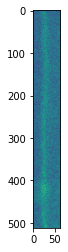

In [32]:
from ncempy.io import dm
im0 = dm.dmReader('/content/gb_5_HAADF.dm3')
plt.imshow(im0['data']) #show the single image from the data file

In [34]:
im0['pixelUnit']

['nm', 'nm']

In [37]:
from numpy import genfromtxt
my_data = genfromtxt('Data.csv', delimiter=',',skip_header=1)
print(my_data)

[[ 0.          0.          1.        ]
 [ 0.01        0.00999983  0.99995   ]
 [ 0.02        0.01999867  0.99980003]
 ...
 [ 9.97       -0.51860795  0.86851002]
 [ 9.98       -0.527132    0.86425339]
 [ 9.99       -0.53560334  0.85996087]]


In [38]:
import pandas as pd
data_xlsx = pd.read_excel('Data.xlsx')

In [39]:
data_xlsx.head()

,X,sin(x),cos(x)
0,0.00,0.000000,1.000000
1,0.01,0.010000,0.999950
2,0.02,0.019999,0.999800
3,0.03,0.029996,0.999550
4,0.04,0.039989,0.999201


In [44]:
wget.download('https://www2.lehigh.edu/sites/www2/files/2020-02/Hulvat-4710.jpg','lehigh.jpg')

'lehigh.jpg'

In [45]:
from matplotlib import image
image_file = image.imread('lehigh.jpg')

In [46]:
image_file.shape

(638, 1080, 3)

/Measurement_000/Channel_000/Raw_Data
/Measurement_000/Channel_002/Raw_Data
/Measurement_000/Channel_004/Raw_Data


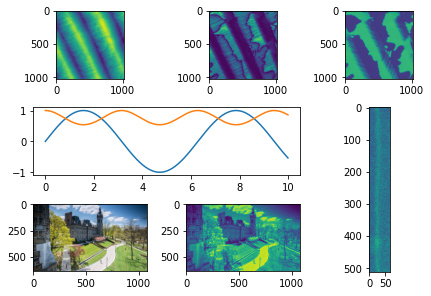

In [51]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

#def format_axes(fig):
#    for i, ax in enumerate(fig.axes):
#        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
#        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True)
gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax11 = fig.add_subplot(gs[0,1])
ax12 = fig.add_subplot(gs[0,2])

ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])

ax_list = [ax1, ax11, ax12]

for i, ax in enumerate(ax_list): 
  print(f'/Measurement_000/Channel_00{i*2}/Raw_Data')
  ax.imshow(np.array(h5_f[f'/Measurement_000/Channel_00{i*2}/Raw_Data']).reshape(1024,1024))

ax3.imshow(im0['data'])

ax2.plot(my_data[:,0],my_data[:,1])
ax2.plot(data_xlsx['X'],data_xlsx['cos(x)'])

ax4.imshow(image_file)
ax5.imshow(image_file[:,:,0])
#format_axes(fig)

plt.savefig('fig.svg', dpi=300)

In [19]:
np.array(h5_f['/Measurement_000/Channel_000/Raw_Data']).shape

(1048576, 1)

### Loading Data from a variety of sources

## Parts of a Figure
![](https://matplotlib.org/_images/anatomy.png)

# Graphical Integrity

# Color scales

# More details about perceptually correct colormaps

# Choosing Colors for your Figures

# Types of Graphs

# Violin Plots
* Like a box plot but provides a deeper understanding of data density
* Good when you have large datasets

# 2D Density Plot
* Used to compare 2D quantitative information
* Good for small data sets
* When the density of data is high (shouldn't use a scatter plot)

# Correlogram
A correlogram or correlation matrix allows to analyse the relationship between each pair of numerical variables of a matrix.

# Dendrogram
* A dendrogram or tree diagram allows to illustrate the hierarchical organisation of several entities.

# Graph Structures
* Show interconnections between a set of entities. 
* Each entity is represented by a Node (or vertices). 
* Connection between nodes are represented through links (or edges).
* Directed or undirected, weighted or unweighted.

# Guiding Principles

# WTF Graphs

# Assignment: 

Take a graph that you have previously used for a publication or assignment and recreate it based on concepts discussed in class. Please provide the original image and the updated image exported from python.